# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
print(max(app_train['CNT_CHILDREN']))
cut_rule = [-1, 0, 2, 5, 19]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

19


(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
#2-1

grp = app_train['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-1.001, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

KeyError: 'Columns not found: 360450.0, 237577.5, 180234.0, 319500.0, 466956.0, 303120.0, 639000.0, 131098.5, 262174.5, 73759.5, 237600.0, 426019.5, 196650.0, 376875.0, 41004.0, 155700.0, 131125.5, 90166.5, 98356.5, 360508.5, 114750.0, 221247.0, 73800.0, 434250.0, 106573.5, 32850.0, 139351.5, 352350.0, 311400.0, 122985.0, 98419.5, 229500.0, 163966.5, 98433.0, 188550.0, 549000.0, 245896.02, 155790.0, 147600.0, 114840.0, 106650.0, 73885.5, 65700.0, 41130.0, 131247.0, 90288.0, 385200.0, 229554.0, 139446.0, 237753.0, 344250.0, 704700.0, 41148.0, 139455.0, 123075.0, 303300.0, 32967.0, 139468.5, 270540.0, 262350.0, 188626.5, 49365.0, 57559.5, 221400.0, 73944.0, 106713.0, 32994.0, 114916.5, 139500.0, 114934.5, 98550.0, 459000.0, 180472.5, 188667.0, 73980.0, 123133.5, 155902.5, 41211.0, 57600.0, 73998.0, 90382.5, 139536.0, 1417500.0, 164133.0, 74025.0, 254250.0, 74029.5, 90414.0, 213300.0, 74038.5, 573750.0, 147766.5, 377145.0, 172350.0, 229702.5, 131400.0, 90441.0, 115020.0, 74061.0, 123219.0, 82260.0, 49500.0, 155997.0, 131422.5, 65884.5, 41314.5, 262503.0, 369000.0, 65902.5, 49522.5, 139635.0, 688500.0, 254322.0, 41332.5, 180598.5, 106870.5, 106875.0, 278910.0, 90499.5, 98698.5, 49549.5, 33165.0, 197005.5, 205200.0, 131481.0, 164250.0, 147870.0, 123300.0, 131494.5, 106920.0, 82350.0, 41400.0, 33214.5, 360900.0, 65997.0, 172498.5, 279000.0, 123354.0, 238050.0, 319972.5, 197100.0, 82413.0, 156141.0, 147955.5, 90612.0, 156150.0, 90615.15, 262647.0, 115200.0, 131584.5, 475650.0, 74250.0, 254475.0, 66060.0, 41485.5, 33300.0, 393750.0, 115227.0, 205348.5, 197158.5, 66087.0, 311850.0, 229932.0, 49716.0, 57915.0, 148032.0, 82498.5, 57924.0, 189000.0, 74313.0, 442953.0, 164430.0, 148050.0, 508500.0, 123480.0, 90712.62, 115290.0, 107100.0, 828000.0, 213601.5, 82530.0, 66150.0, 82534.5, 57960.0, 74344.5, 1147500.0, 49783.5, 131706.0, 344700.0, 107136.0, 123525.0, 303750.0, 115335.0, 98955.0, 82575.0, 262800.0, 221850.0, 180900.0, 139950.0, 99000.0, 90810.0, 82624.5, 58050.0, 418500.0, 123588.0, 58063.5, 139986.0, 246483.0, 99031.5, 189148.5, 295650.0, 74475.0, 254700.0, 107251.65, 213750.0, 140022.0, 90877.5, 123646.5, 172800.0, 180999.0, 131850.0, 131854.5, 74511.0, 90900.0, 107284.5, 66330.0, 49950.0, 410400.0, 189229.5, 90927.0, 328500.0, 189238.5, 172854.0, 197433.0, 115515.0, 287550.0, 648000.0, 246600.0, 131913.0, 631624.5, 967500.0, 115533.0, 205650.0, 123736.5, 115546.5, 164700.0, 181084.5, 123750.0, 115560.0, 82800.0, 443250.0, 140152.5, 41850.0, 91008.0, 58243.5, 107397.0, 123786.0, 238477.5, 107406.0, 320400.0, 131998.5, 164767.5, 74659.5, 238500.0, 50085.0, 99238.5, 91048.5, 107437.5, 197550.0, 558000.0, 99252.0, 156600.0, 336825.0, 254907.0, 877500.0, 230332.5, 164799.0, 115650.0, 336835.935, 148423.5, 402376.5, 74700.0, 99283.5, 41940.0, 33750.0, 82903.5, 140249.7, 173025.0, 353250.0, 123876.0, 99301.5, 459751.5, 132075.0, 107500.5, 312300.0, 304110.0, 271350.0, 2475000.0, 74749.5, 230400.0, 99328.5, 82948.5, 41989.5, 205830.0, 287752.5, 189450.0, 181260.0, 123916.5, 541710.0, 148500.0, 107550.0, 156703.5, 468000.0, 148513.5, 164898.0, 173088.0, 99364.5, 107554.5, 115744.5, 66600.0, 427050.0, 787500.0, 25650.0, 386100.0, 91188.0, 173115.0, 123975.0, 83025.0, 263250.0, 197721.0, 33885.0, 91233.0, 50274.0, 574564.5, 148581.0, 124006.5, 173160.0, 148585.5, 140400.0, 394353.0, 263281.5, 99450.0, 173178.0, 107649.0, 58500.0, 164997.0, 296068.5, 91269.0, 378000.0, 74898.0, 50323.5, 58518.0, 337050.0, 697500.0, 156829.5, 99490.5, 296100.0, 255150.0, 99504.0, 148657.5, 214200.0, 83128.5, 189630.0, 173250.0, 99526.5, 132300.0, 107725.5, 246996.0, 91350.0, 74970.0, 50400.0, 410850.0, 107752.5, 124141.5, 181498.5, 34042.5, 288000.0, 34052.715, 394501.5, 296199.0, 607500.0, 238864.5, 140562.0, 189715.5, 206100.0, 107797.5, 132372.0, 66843.0, 132381.0, 165150.0, 148770.0, 124200.0, 173353.5, 296235.0, 116014.5, 107824.5, 83250.0, 156978.0, 443700.0, 99634.5, 230710.5, 173367.0, 165177.0, 66874.5, 42300.0, 402750.0, 116032.5, 173376.0, 91458.0, 157005.0, 140625.0, 320850.0, 197973.0, 99675.0, 58725.0, 83304.0, 58729.5, 198000.0, 107896.5, 157050.0, 83322.0, 517500.0, 296316.0, 42367.5, 116100.0, 837000.0, 91530.0, 75150.0, 435600.0, 42390.0, 34200.0, 91552.5, 386473.5, 312750.0, 58806.0, 271800.0, 263610.0, 173502.0, 181696.5, 50625.0, 230850.0, 181701.0, 189900.0, 67023.0, 173520.0, 206289.0, 99796.5, 173524.5, 148950.0, 108000.0, 91620.0, 263655.0, 67050.0, 3950059.5, 427500.0, 132588.0, 116212.5, 26100.0, 91638.0, 747000.0, 132601.5, 288252.0, 435708.0, 140800.5, 75267.0, 124425.0, 140814.0, 263700.0, 189972.0, 124438.5, 83479.5, 214555.5, 50715.0, 222750.0, 214560.0, 2025000.0, 181800.0, 222763.5, 140850.0, 99900.0, 124479.0, 58945.5, 132673.5, 58950.0, 132678.0, 75339.0, 362061.0, 124501.5, 337500.0, 673380.0, 296550.0, 657000.0, 132718.5, 198256.5, 255600.0, 214650.0, 460417.5, 173700.0, 337545.0, 132750.0, 1935000.0, 91800.0, 452250.0, 255645.0, 149152.5, 50850.0, 231075.0, 411300.0, 59049.0, 198315.0, 329400.0, 59067.0, 59076.0, 140998.5, 116424.0, 132808.5, 67275.0, 247500.0, 272079.0, 206550.0, 567000.0, 141016.5, 132826.5, 1009368.0, 165600.0, 886500.0, 100071.0, 124650.0, 198378.0, 460525.5, 83700.0, 75510.0, 100089.0, 59130.0, 42750.0, 149247.0, 403200.0, 59134.5, 362250.0, 141075.0, 100125.0, 280350.0, 75550.5, 239400.0, 124713.0, 50985.0, 157486.5, 141106.5, 141111.0, 157500.0, 117000000.0, 247621.5, 116550.0, 477000.0, 149323.5, 83790.0, 75600.0, 796500.0, 51030.0, 468823.5, 34650.0, 395100.0, 26460.0, 165735.0, 206698.5, 132975.0, 313200.0, 75634.65, 42867.0, 1755000.0, 272250.0, 247675.5, 116604.0, 59265.0, 231300.0, 157576.5, 190350.0, 59278.5, 75667.5, 206743.5, 149400.0, 108450.0, 108454.5, 165798.0, 67500.0, 116653.5, 149422.5, 116658.0, 223155.0, 280498.5, 100278.0, 26550.0, 387000.0, 141241.5, 247738.5, 599998.5, 190399.5, 346050.0, 157635.0, 706500.0, 100300.5, 305100.0, 83916.0, 141264.0, 264150.0, 108504.0, 223200.0, 34785.0, 165861.0, 1665000.0, 190440.0, 182250.0, 67567.5, 51187.5, 141300.0, 133110.0, 100350.0, 83970.0, 190467.0, 43011.0, 231430.5, 59400.0, 51210.0, 157707.0, 43020.0, 198675.0, 378900.0, 83997.0, 133155.0, 34852.5, 174118.5, 116775.0, 297000.0, 149553.0, 124978.5, 256050.0, 616500.0, 34875.0, 215100.0, 84028.5, 936000.0, 174150.0, 354375.0, 133200.0, 247891.5, 165973.5, 1575000.0, 92250.0, 141408.0, 51300.0, 84069.0, 411750.0, 125032.5, 166005.0, 100476.0, 141439.5, 305280.0, 141444.0, 67725.0, 305295.75, 141457.5, 190611.0, 207000.0, 100507.5, 166050.0, 346275.0, 526500.0, 100516.5, 395433.0, 133290.0, 125100.0, 141493.5, 84150.0, 43200.0, 223425.0, 403650.0, 157905.0, 133330.5, 141525.0, 100566.0, 321750.0, 92376.0, 18000090.0, 51421.5, 108765.0, 690399.0, 92385.0, 2214117.0, 51430.5, 35046.0, 174312.0, 239850.0, 198900.0, 166140.0, 182524.5, 157950.0, 223488.0, 117000.0, 174348.0, 436495.5, 76050.0, 436500.0, 231700.5, 43285.5, 100629.0, 43290.0, 35100.0, 215325.0, 756000.0, 149796.0, 141606.0, 354600.0, 92457.0, 256297.5, 313650.0, 108855.0, 108859.5, 231741.0, 682303.5, 231750.0, 92489.85, 149836.5, 190800.0, 158035.5, 174420.0, 133461.0, 158040.0, 174424.5, 149850.0, 264543.75, 1001826.0, 297315.0, 108900.0, 158053.5, 108904.5, 174442.5, 280941.3, 67950.0, 51570.0, 133492.5, 182646.0, 27000.0, 133497.0, 239998.5, 346500.0, 125316.0, 117130.5, 305550.0, 666000.0, 256405.5, 141727.5, 362911.5, 43425.0, 223650.0, 68004.0, 1305000.0, 182700.0, 92592.0, 100786.5, 174514.5, 141750.0, 51642.0, 133564.5, 215487.0, 100800.0, 117189.0, 59850.0, 76248.0, 182745.0, 338400.0, 51691.5, 256500.0, 100854.0, 117243.0, 215550.0, 576000.0, 174600.0, 133650.0, 494100.0, 150039.0, 1215000.0, 84505.5, 68123.115, 92700.0, 4500000.0, 117283.5, 51750.0, 141867.0, 371250.0, 354879.0, 223807.5, 289350.0, 117319.5, 117324.0, 248400.0, 100944.0, 150102.0, 141912.0, 174681.0, 207450.0, 68188.5, 84577.5, 166500.0, 199273.5, 51817.5, 125550.0, 486000.0, 223857.0, 109170.0, 305779.5, 84600.0, 445050.0, 207486.0, 51840.0, 43650.0, 133762.5, 1125000.0, 215689.5, 412308.0, 35482.5, 174748.5, 281250.0, 191142.0, 76455.0, 223915.5, 240300.0, 60075.0, 117423.0, 199350.0, 117436.5, 371392.2, 158400.0, 264901.5, 117450.0, 109260.0, 264910.5, 133843.5, 76500.0, 174807.0, 142042.5, 101083.5, 35550.0, 396000.0, 355050.0, 133875.0, 314100.0, 109300.5, 1035000.0, 76536.0, 273150.0, 101119.5, 125698.5, 183042.45, 232200.0, 117513.0, 101128.5, 92943.0, 191250.0, 117522.0, 174870.0, 150300.0, 109341.0, 125730.0, 109350.0, 469800.0, 101164.5, 68400.0, 117553.5, 174897.0, 338746.5, 199498.5, 174924.0, 133965.0, 248652.0, 306000.0, 93010.5, 191317.5, 625500.0, 76639.5, 224100.0, 945000.0, 43884.0, 183150.0, 150385.5, 142200.0, 68481.0, 101250.0, 76675.5, 117639.0, 76680.0, 60300.0, 527247.0, 109458.0, 109467.0, 297900.0, 404406.0, 256950.0, 76729.5, 93114.0, 109498.5, 216000.0, 43969.5, 27585.0, 175050.0, 535500.0, 125901.45, 248782.5, 134100.0, 216022.5, 125910.0, 855000.0, 60376.5, 355293.0, 93150.0, 150493.5, 52200.0, 93163.5, 101362.5, 191475.0, 93177.0, 150525.0, 175108.5, 134149.5, 44037.0, 109575.0, 117765.0, 289800.0, 248841.0, 265234.5, 248850.0, 207900.0, 85023.0, 93217.5, 109603.35, 166950.0, 76842.0, 126000.0, 232497.0, 93235.5, 85050.0, 445500.0, 183357.0, 158782.5, 44100.0, 765000.0, 150601.5, 183375.0, 52303.5, 142425.0, 322650.0, 142438.5, 134248.5, 240750.0, 126063.0, 167031.0, 199800.0, 560250.0, 158850.0, 117900.0, 224399.025, 101520.0, 76950.0, 36000.0, 142497.0, 191651.535, 150691.5, 355500.0, 675000.0, 117949.5, 76995.0, 52425.0, 232650.0, 191695.5, 191700.0, 371925.0, 52438.5, 44248.5, 150750.0, 117985.5, 208098.0, 117990.0, 109800.0, 68841.0, 68850.0, 52470.0, 142587.0, 27900.0, 388350.0, 134401.95, 347400.0, 150799.5, 134415.0, 134419.5, 265491.0, 68886.0, 118039.5, 150808.5, 281880.0, 265500.0, 118048.5, 52515.0, 44325.0, 93478.5, 585000.0, 257323.5, 183600.0, 44338.5, 126261.0, 142650.0, 27967.5, 101700.0, 167242.5, 109899.0, 68940.0, 60750.0, 232785.0, 339282.0, 44370.0, 36180.0, 200025.0, 265567.5, 52582.5, 699750.0, 101740.5, 265581.0, 93550.5, 298350.0, 77175.0, 257400.0, 85374.0, 126346.5, 175500.0, 167310.0, 69012.0, 134550.0, 167319.0, 495000.0, 77211.0, 93600.0, 150952.5, 52650.0, 175531.5, 232875.0, 314797.5, 183726.0, 118197.0, 93627.0, 101826.0, 167368.5, 110025.0, 290250.0, 101835.0, 118233.0, 536026.5, 282073.5, 60889.5, 265693.5, 208350.0, 142816.5, 93667.5, 110052.0, 167400.0, 93672.0, 126450.0, 52726.5, 85500.0, 28161.0, 93699.0, 126468.0, 134662.5, 44550.0, 405000.0, 101902.5, 183825.0, 77332.5, 118292.85, 495126.0, 36382.5, 224802.0, 716323.5, 241200.0, 142897.5, 93748.5, 216630.0, 200250.0, 44604.0, 69183.0, 167490.0, 159300.0, 118350.0, 175698.0, 36436.5, 77400.0, 257625.0, 192091.5, 36450.0, 167526.0, 110187.0, 315000.0, 110200.5, 396922.5, 69246.0, 3600000.0, 274050.0, 634500.0, 102024.0, 77449.5, 233100.0, 142992.0, 159376.5, 175761.0, 192150.0, 143005.5, 151200.0, 192163.5, 110250.0, 110254.5, 159408.0, 69300.0, 224949.735, 126652.5, 28350.0, 61119.0, 85702.5, 159435.0, 167629.5, 306900.0, 93910.5, 126679.5, 265950.0, 93919.5, 143073.0, 118498.5, 224995.5, 77539.5, 134887.5, 225000.0, 151276.5, 151281.0, 28404.0, 544500.0, 93942.0, 126711.0, 110331.0, 143100.0, 69372.0, 36607.5, 864000.0, 93951.0, 85761.0, 102150.0, 151303.5, 93960.0, 167692.5, 126733.5, 77580.0, 61200.0, 110353.5, 749331.0, 315157.5, 380700.0, 126751.5, 200479.5, 339750.0, 93991.5, 110376.0, 36652.5, 151348.5, 77625.0, 257850.0, 118593.0, 274243.5, 216900.0, 110403.0, 36679.5, 184135.5, 94027.5, 175950.0, 77647.5, 102222.0, 175954.5, 134995.5, 135000.0, 225112.5, 159579.0, 225117.0, 94050.0, 454500.0, 266085.0, 348007.5, 126823.5, 266089.5, 53100.0, 159597.0, 774000.0, 126832.5, 118642.5, 167805.0, 151425.0, 282501.0, 110475.0, 184203.0, 290700.0, 61326.0, 143248.5, 200592.0, 208786.5, 53140.5, 69525.0, 249750.0, 77719.5, 44955.0, 348061.5, 85918.5, 28575.0, 208800.0, 176040.0, 167850.0, 528300.0, 28593.0, 126900.0, 85950.0, 233406.0, 176067.0, 102343.5, 45000.0, 184270.5, 102352.5, 364500.0, 36828.0, 684000.0, 282600.0, 241650.0, 200700.0, 708610.5, 192514.5, 159750.0, 69642.0, 233482.5, 290826.0, 69646.5, 118800.0, 479250.0, 495634.5, 77850.0, 77854.5, 36900.0, 217125.0, 86058.0, 176175.0, 28723.5, 77881.5, 102465.0, 77890.5, 274500.0, 331855.245, 594000.0, 192600.0, 151641.0, 200794.5, 143451.0, 135256.5, 151650.0, 86116.5, 53352.0, 143464.5, 110700.0, 86130.0, 69750.0, 233595.0, 127102.5, 28800.0, 77953.5, 45184.5, 209025.0, 389250.0, 159880.5, 77962.5, 37008.0, 102546.0, 127125.0, 307350.0, 274590.0, 266400.0, 77985.0, 143527.5, 225450.0, 77998.5, 3150000.0, 184500.0, 192694.5, 45238.5, 331960.5, 143550.0, 118975.5, 504000.0, 143559.0, 102600.0, 184522.5, 135373.5, 1306831.5, 61650.0, 422100.0, 217300.5, 381150.0, 250078.5, 45279.0, 53478.0, 159975.0, 340200.0, 151785.0, 159979.5, 45292.5, 78061.5, 299250.0, 94450.5, 135418.5, 78075.0, 258300.0, 200961.0, 61699.5, 78084.0, 217350.0, 143631.0, 176400.0, 356625.0, 135450.0, 45346.5, 94500.0, 200997.0, 102694.5, 86310.0, 143653.5, 53550.0, 348462.0, 414000.0, 168241.5, 69943.5, 192825.0, 184635.0, 733500.0, 332100.0, 176458.5, 135499.5, 151884.0, 78156.0, 119119.5, 414031.5, 78160.5, 250200.0, 209241.0, 94554.0, 364891.5, 209250.0, 168300.0, 53613.0, 127350.0, 151929.0, 143739.0, 102780.0, 323968.5, 86400.0, 61830.0, 70024.5, 45450.0, 94603.5, 127372.5, 250263.0, 37273.5, 217498.5, 143775.0, 324000.0, 70047.0, 201127.5, 78250.5, 78255.0, 61875.0, 242100.0, 53685.0, 201150.0, 381375.0, 119232.0, 1282500.0, 160200.0, 29133.0, 119250.0, 45522.0, 127449.0, 324058.5, 78300.0, 438750.0, 61920.0, 45540.0, 225765.0, 37350.0, 143847.0, 307692.0, 373230.0, 356850.0, 86517.0, 45558.0, 53752.5, 70137.0, 94716.0, 225792.0, 127498.5, 78349.5, 61965.0, 234000.0, 209430.0, 193050.0, 553500.0, 152100.0, 184869.0, 160294.5, 397867.5, 111150.0, 217647.0, 283185.0, 184882.5, 201267.0, 1192500.0, 70200.0, 119353.5, 430650.0, 143932.5, 70209.0, 29250.0, 78403.5, 234054.0, 78408.0, 127561.5, 348750.0, 103000.5, 135774.0, 45675.0, 225900.0, 53869.5, 119407.5, 111217.5, 193140.0, 94837.5, 184950.0, 144000.0, 103041.0, 864900.0, 103050.0, 78475.5, 463500.0, 201361.5, 111249.0, 62100.0, 1053333.0, 291478.5, 234135.0, 783000.0, 119457.0, 1102500.0, 160425.0, 135850.5, 119475.0, 299700.0, 209587.5, 258750.0, 234184.5, 217800.0, 176850.0, 160470.0, 53977.5, 135900.0, 45792.0, 78561.0, 2700000.0, 152293.5, 94950.0, 62181.0, 70380.0, 103149.0, 54000.0, 135927.0, 373500.0, 160515.0, 693000.0, 54027.0, 168718.5, 152334.0, 1012500.0, 119578.5, 54045.0, 209700.0, 168750.0, 160560.0, 209713.5, 217908.0, 127800.0, 103230.0, 176958.0, 258880.5, 86850.0, 267075.0, 70470.0, 78664.5, 152392.5, 45900.0, 62284.5, 37710.0, 635728.5, 127831.5, 152415.0, 45922.5, 78691.5, 176998.5, 226152.0, 283500.0, 177012.0, 193396.5, 242550.0, 86904.0, 603000.0, 119677.5, 201600.0, 70528.5, 144261.0, 152455.5, 160650.0, 54157.5, 29583.0, 127890.0, 119700.0, 111510.0, 62361.0, 78750.0, 152478.0, 185247.0, 250785.0, 37800.0, 250794.0, 660397.5, 70578.0, 127926.0, 201658.5, 46012.5, 1307587.5, 545733.0, 242631.0, 136138.5, 86994.0, 234450.0, 95188.5, 103387.5, 193500.0, 46044.0, 37854.0, 87007.5, 185310.0, 168930.0, 152550.0, 332775.0, 513000.0, 103401.0, 234472.5, 144360.0, 70636.5, 111600.0, 226291.5, 832500.0, 70650.0, 62460.0, 111618.0, 29700.0, 103432.5, 209929.5, 160780.5, 349200.0, 111640.5, 308250.0, 267300.0, 46120.5, 226350.0, 209970.0, 119862.0, 185400.0, 62523.0, 9000000.0, 144450.0, 78916.5, 209992.5, 103500.0, 62541.0, 78930.0, 201811.5, 62550.0, 423000.0, 87129.0, 218200.5, 742500.0, 341100.0, 87151.5, 259186.5, 152694.0, 300150.0, 193657.5, 1381500.0, 259200.0, 38025.0, 218250.0, 70798.5, 177300.0, 193684.5, 62613.0, 136350.0, 210078.0, 160933.5, 95400.0, 455850.0, 87210.0, 169137.0, 54450.0, 70834.5, 79029.45, 87223.5, 144567.0, 283837.5, 373950.0, 62653.5, 87232.5, 324805.5, 333000.0, 226512.0, 292050.0, 160978.5, 652500.0, 251100.0, 169182.0, 87268.5, 193765.5, 210150.0, 95463.0, 79078.5, 283882.5, 120042.0, 1291500.0, 169200.0, 144625.5, 128250.0, 120060.0, 242941.5, 193792.5, 87300.0, 70920.0, 267529.5, 46350.0, 2250000.0, 578835.0, 365850.0, 136480.5, 185634.0, 177448.5, 152874.0, 111915.0, 111919.5, 103729.5, 243000.0, 202050.0, 562500.0, 234823.5, 70987.5, 218443.5, 161100.0, 341325.0, 251212.5, 882000.0, 103761.0, 128340.0, 120150.0, 300379.5, 95580.0, 218461.5, 79200.0, 87394.5, 144742.5, 38250.0, 2930026.5, 87403.5, 71023.5, 193905.0, 431478.0, 357750.0, 169335.0, 103801.5, 161149.5, 2160000.0, 677250.0, 103810.5, 169348.5, 103815.0, 275850.0, 103824.0, 79249.5, 112018.5, 234900.0, 87444.0, 128407.5, 87448.5, 103837.5, 193950.0, 103842.0, 153000.0, 136620.0, 46512.0, 112050.0, 472500.0, 71100.0, 251325.0, 87493.5, 30150.0, 210375.0, 169416.0, 218569.5, 546250.5, 374220.0, 284112.0, 71127.0, 144855.0, 218587.5, 161244.0, 267750.0, 46566.0, 79335.0, 2070000.0, 587250.0, 71154.0, 185850.0, 128511.0, 218623.5, 54787.5, 144900.0, 71172.0, 136710.0, 120325.5, 144904.5, 210442.5, 103950.0, 38419.155, 120339.0, 63000.0, 169497.0, 161307.0, 112158.0, 128542.5, 95778.0, 202275.0, 382500.0, 931365.0, 153130.5, 341550.0, 702000.0, 185904.0, 161329.5, 300600.0, 38457.0, 292414.5, 120384.0, 79425.0, 87619.5, 104008.5, 63049.5, 194121.0, 218700.0, 104017.5, 95827.5, 177750.0, 144985.5, 292446.0, 136800.0, 235107.0, 317029.5, 112230.0, 95850.0, 194157.0, 54900.0, 169591.5, 177786.0, 185985.0, 128646.0, 120456.0, 112266.0, 292500.0, 145044.0, 112279.5, 612000.0, 317088.0, 95904.0, 63139.5, 210600.0, 186025.5, 95917.5, 104112.0, 169650.0, 349875.0, 128695.5, 120505.5, 128700.0, 382657.5, 63171.0, 87750.0, 79560.0, 104139.0, 112333.5, 46800.0, 1890000.0, 79569.0, 87763.5, 54994.5, 104175.0, 284400.0, 349938.0, 161536.5, 136962.0, 202500.0, 104202.0, 251662.5, 161550.0, 522000.0, 161554.5, 120600.0, 841500.0, 849694.5, 87840.0, 79650.0, 440100.0, 186151.5, 145192.5, 169771.5, 38700.0, 218925.0, 177966.0, 112428.0, 104247.0, 358200.0, 186174.0, 235327.5, 1800000.0, 137025.0, 137029.5, 177993.0, 96075.0, 276300.0, 87890.58, 63315.0, 235350.0, 194400.0, 46948.5, 153450.0, 112491.0, 178029.0, 112500.0, 87925.5, 96120.0, 71545.5, 71550.0, 432000.0, 46980.0, 30600.0, 137097.0, 751500.0, 194445.0, 178065.0, 79767.0, 153495.0, 161694.0, 309150.0, 186273.9, 112549.5, 268200.0, 210856.5, 112558.5, 120753.0, 227250.0, 128947.5, 333751.5, 186300.0, 104382.0, 235458.0, 145350.0, 104391.0, 104400.0, 120784.5, 88020.0, 341973.0, 63450.0, 243675.0, 112608.0, 96228.0, 128997.0, 137191.5, 219114.0, 71662.5, 342000.0, 104436.0, 120820.5, 661500.0, 79875.0, 260100.0, 153607.5, 292873.5, 235530.0, 153612.0, 71694.0, 219150.0, 88087.5, 178200.0, 161815.5, 137250.0, 129060.0, 96295.5, 153639.0, 96300.0, 55350.0, 202806.0, 235575.0, 170041.5, 63544.5, 194625.0, 63553.5, 71748.0, 415813.5, 88132.5, 145480.5, 153675.0, 47191.5, 145498.5, 47196.0, 1235038.5, 112734.0, 252000.0, 260190.0, 145503.0, 145507.5, 96358.5, 211050.0, 571500.0, 194670.0, 186480.0, 170100.0, 202873.5, 129150.0, 219262.5, 317569.5, 153729.0, 88200.0, 137358.0, 1530000.0, 47250.0, 153747.0, 112795.65, 366750.0, 80032.5, 104611.5, 325800.0, 112810.5, 129195.0, 63661.5, 39087.0, 284850.0, 350392.5, 243900.0, 112833.0, 30915.0, 96453.0, 202950.0, 129222.0, 47304.0, 129226.5, 162000.0, 374998.5, 80086.5, 137430.0, 121050.0, 481500.0, 80100.0, 39150.0, 202990.5, 219375.0, 194809.5, 47353.5, 104701.5, 1440000.0, 96525.0, 276750.0, 178447.5, 211216.5, 63765.0, 293148.0, 416029.5, 194850.0, 268578.0, 153900.0, 104755.5, 137524.5, 112950.0, 71995.5, 170302.5, 555327.0, 72000.0, 342337.5, 80194.5, 96579.0, 235849.5, 194890.5, 31050.0, 391500.0, 211275.0, 72013.5, 121162.5, 711000.0, 63837.0, 129375.0, 170343.0, 268650.0, 63850.5, 121198.5, 1350000.0, 55665.0, 113008.5, 285043.5, 227700.0, 88434.0, 186750.0, 203134.5, 489861.0, 153990.0, 145800.0, 39307.5, 153999.0, 104850.0, 235930.5, 63900.0, 178589.7, 424350.0, 178591.5, 88483.5, 113062.5, 383400.0, 129451.5, 39339.0, 80302.5, 514480.5, 137655.0, 301500.0, 203197.5, 211392.0, 137664.0, 55746.0, 88515.0, 121284.0, 80325.0, 621000.0, 113098.5, 137677.5, 121297.5, 235993.5, 178650.0, 1260000.0, 137700.0, 162279.0, 96750.0, 55800.0, 104953.5, 96763.5, 80383.5, 96768.0, 260613.0, 186885.0, 154125.0, 80397.0, 72207.0, 121360.5, 293400.0, 252450.0, 96804.0, 203301.0, 104998.5, 293418.0, 121387.5, 211500.0, 178735.5, 170550.0, 531000.0, 129600.0, 416322.0, 391747.5, 96835.5, 55881.0, 88650.0, 64080.0, 88656.75, 1170000.0, 47700.0, 113238.0, 137821.5, 146016.0, 326250.0, 113260.5, 88686.0, 285300.0, 105084.0, 244350.0, 203400.0, 563850.0, 96907.5, 162450.0, 211603.5, 113301.0, 137880.0, 121500.0, 227997.0, 105120.0, 80550.0, 441000.0, 154282.5, 236205.0, 47790.0, 64174.5, 39600.0, 105142.5, 277177.5, 359100.0, 1080000.0, 96961.5, 129748.5, 260820.0, 1358550.0, 64215.0, 56025.0, 236250.0, 195300.0, 187110.0, 154350.0, 170734.5, 113400.0, 293625.0, 72450.0, 252675.0, 88843.5, 31500.0, 137997.0, 351000.0, 105241.5, 219930.93, 170784.0, 129825.0, 310050.0, 670500.0, 391972.5, 31531.5, 269100.0, 990000.0, 228150.0, 72508.5, 203580.0, 727870.5, 187200.0, 146250.0, 162643.5, 105300.0, 432981.0, 187222.5, 64350.0, 97123.5, 195430.5, 72558.0, 342900.0, 80761.5, 138105.0, 105345.0, 187267.5, 261000.0, 48010.5, 56209.5, 220050.0, 64404.0, 580500.0, 179100.0, 318366.0, 170910.0, 900000.0, 138150.0, 48042.0, 97200.0, 170937.0, 56250.0, 138172.5, 129982.5, 195525.0, 375750.0, 760792.5, 293850.0, 179163.0, 211932.0, 138208.5, 220131.0, 252900.0, 310248.0, 138226.5, 64498.5, 211954.5, 171000.0, 277497.0, 56313.0, 269311.5, 130050.0, 105475.5, 490500.0, 130059.0, 89100.0, 760846.5, 810000.0, 154642.5, 48150.0, 171036.0, 56349.0, 171045.0, 121900.5, 64557.0, 113710.5, 138288.15, 179248.5, 48181.5, 285750.0, 171067.5, 138303.0, 244800.0, 64579.5, 31815.0, 64584.0, 179271.0, 203850.0, 113742.0, 105552.0, 162900.0, 269397.0, 138330.0, 310365.0, 121950.0, 212062.5, 81000.0, 187497.0, 40050.0, 146547.0, 400500.0, 31860.0, 326772.0, 720000.0, 711810.0, 48262.5, 138375.0, 105610.5, 236682.0, 97425.0, 326803.5, 195736.95, 236700.0, 72864.0, 138402.0, 162981.0, 195750.0, 89253.0, 154800.0, 113850.0, 146623.5, 72900.0, 433350.0, 31950.0, 261328.5, 56529.0, 40149.0, 72922.5, 64732.5, 203998.5, 318690.0, 146659.5, 310500.0, 105705.0, 89325.0, 630000.0, 154867.5, 31990.5, 228600.0, 204025.5, 949500.0, 171261.0, 236799.0, 187650.0, 212233.5, 40203.0, 146700.0, 105750.0, 81180.0, 72990.0, 64800.0, 56610.0, 40230.0, 130342.5, 105768.0, 81193.5, 32040.0, 269613.0, 138541.5, 245046.6, 343350.0, 146749.5, 138559.5, 302400.0, 56641.5, 56646.765, 236880.0, 40275.0, 220500.0, 146771.91, 154966.5, 122202.0, 81243.0, 138586.5, 179550.0, 540000.0, 900450.0, 3825000.0, 138600.0, 171369.0, 97641.0, 48492.0, 105840.0, 97650.0, 40306.5, 56695.5, 73080.0, 64890.0, 155002.5, 56700.0, 146812.5, 32139.0, 253323.0, 114066.0, 114075.0, 294300.0, 56740.5, 73125.0, 253350.0, 64939.05, 212400.0, 392625.0, 171441.0, 130486.5, 163255.5, 171450.0, 318906.0, 163260.0, 245182.5, 97726.5, 64962.0, 97731.0, 130500.0, 56776.5, 73161.0, 89550.0, 450000.0, 32211.0, 48600.0, 228825.0, 32220.0, 81373.5, 122350.5, 105975.0, 286200.0, 89595.0, 138748.5, 228861.0, 105984.0, 65025.0, 245250.0, 204300.0, 130572.0, 163350.0, 171544.5, 114201.0, 253467.0, 81436.5, 122400.0, 482850.0, 163363.5, 114210.0, 97830.0, 81450.0, 97834.5, 294448.5, 40500.0, 146997.0, 761400.0, 253503.0, 360000.0, 228928.5, 56902.5, 106056.0, 433737.0, 679500.0, 97875.0, 400981.5, 237150.0, 13500000.0, 97893.0, 130662.0, 196200.0, 540270.0, 106096.5, 155250.0, 81522.0, 122485.5, 97915.5, 114300.0, 73341.0, 171643.5, 73350.0, 122503.5, 433800.0, 48780.0, 32400.0, 392850.0, 56979.0, 327316.5, 196245.0, 351891.0, 73368.0, 81562.5, 351900.0, 97951.5, 114336.0, 56997.0, 114349.5, 270000.0, 450225.0, 138937.5, 97978.5, 270013.5, 188100.0, 909000.0, 147150.0, 57046.5, 106200.0, 646875.0, 138973.5, 65250.0, 48883.5, 876276.0, 114421.5, 343800.0, 114435.0, 40707.0, 65286.0, 401161.5, 155403.0, 261900.0, 89874.0, 130837.5, 81688.5, 114457.5, 114462.0, 180000.0, 40738.5, 139050.0, 319275.0, 499500.0, 6750000.0, 98100.0, 163638.0, 122679.0, 458550.0, 81724.5, 57150.0, 89919.0, 122688.0, 196434.0, 81747.0, 343890.0, 188244.0, 335700.0, 81751.5, 73561.5, 507739.5, 294750.0, 73575.0, 253800.0, 106348.5, 49005.0, 81774.0, 98158.5, 32625.0, 106362.0, 32634.0, 171900.0, 180090.0, 106371.0, 130950.0, 89995.5, 73615.5, 90000.0, 81810.0, 180117.0, 3375000.0, 73624.5, 49050.0, 409500.0, 106398.0, 90018.0, 139171.5, 475047.0, 729000.0, 262062.0, 73647.0, 278446.95, 32692.5, 106425.0, 90045.0, 106434.0, 253890.0, 245700.0, 196546.5, 327622.5, 139207.5, 204750.0, 163795.5, 196564.5, 163800.0, 122841.0, 221148.0, 122850.0, 483300.0, 335848.5, 81900.0, 442350.0, 196591.5, 65520.0, 73714.5, 65524.5, 40950.0, 147447.0, 196605.0, 98302.5'

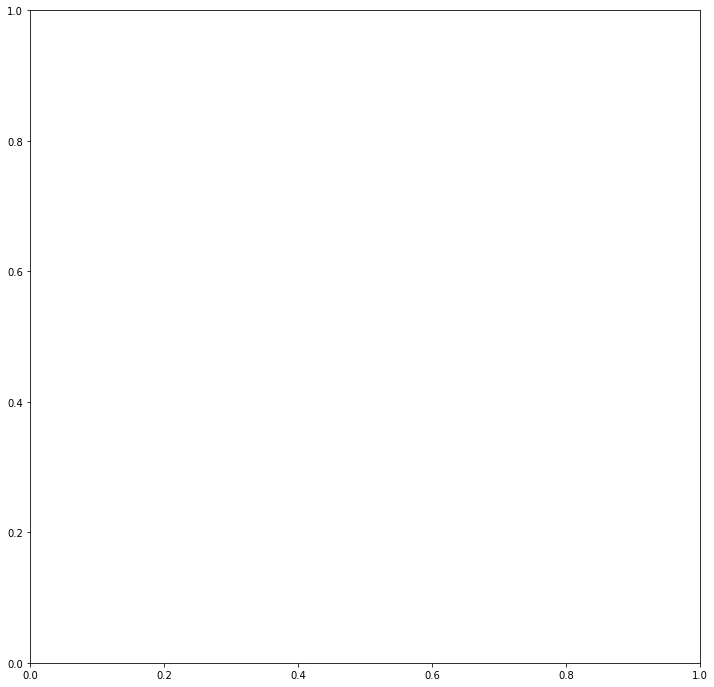

In [13]:
#2-2

plt_column = app_train['AMT_INCOME_TOTAL']
plt_by = app_train['CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [16]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (plt_column - np.mean(plt_column)) / np.std(plt_column))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

TypeError: incompatible index of inserted column with frame index